# Exercises - Working with time series data

For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.



Call the sf_temps() dataset from the vega_datasets library like so:


data.sf_temps()
Use the above dataset for the following exercises:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [1]:
pip install vega_datasets

Note: you may need to restart the kernel to use updated packages.


In [86]:
from vega_datasets import data
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

In [3]:
temp_df = data.sf_temps()
temp_df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [4]:
temp_df['date'] = pd.to_datetime(temp_df['date'])
temp_df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [5]:
temp_df = temp_df.set_index('date')
temp_df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [6]:
temp_df.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


<AxesSubplot:xlabel='date'>

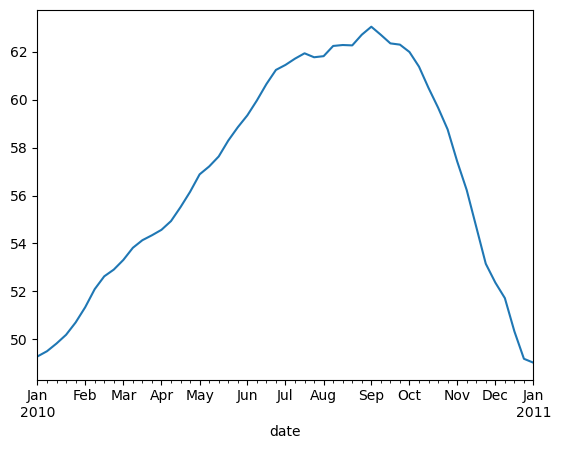

In [7]:
temp_df.resample('W').mean()['temp'].plot()

2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

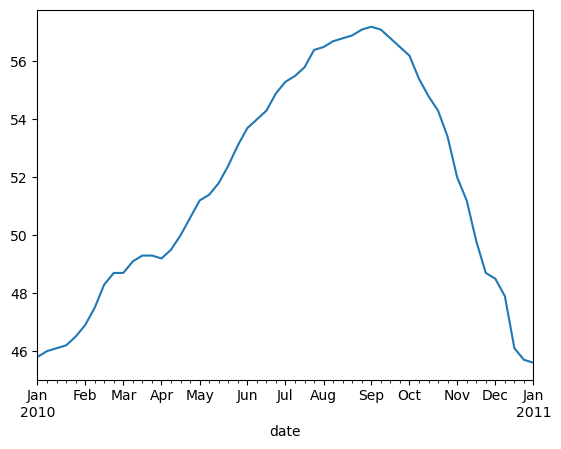

In [8]:
temp_df.resample('W').min()['temp'].plot()

3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

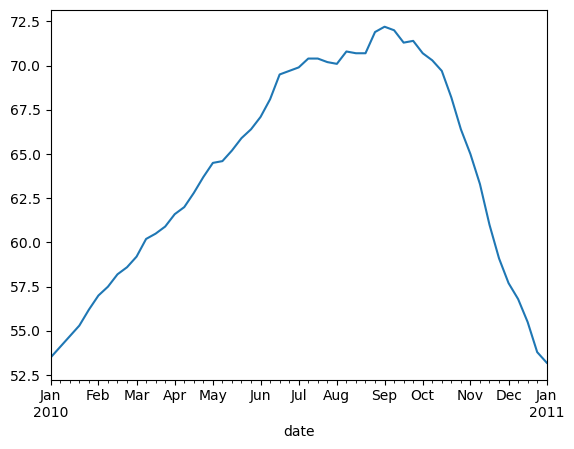

In [9]:
temp_df.resample('W').max()['temp'].plot()

4. Which month is the coldest, on average?

In [10]:
avg_temp = temp_df.resample('M').mean()
avg_temp['temp'].idxmin()

Timestamp('2010-01-31 00:00:00', freq='M')

5. Which month has the highest average temperature?

In [11]:
hottest_month = temp_df.resample('M').mean()
hottest_month['temp'].idxmax()

Timestamp('2010-09-30 00:00:00', freq='M')

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [12]:
temp_df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [13]:
new_df = temp_df.resample('D').agg(['min', 'max'])
new_df['variability'] = new_df['temp']['max'] - new_df['temp']['min']


In [14]:
highest_var = new_df.resample('M').max()
highest_var['variability'].idxmax()

Timestamp('2010-08-31 00:00:00', freq='M')

7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<AxesSubplot:xlabel='date'>

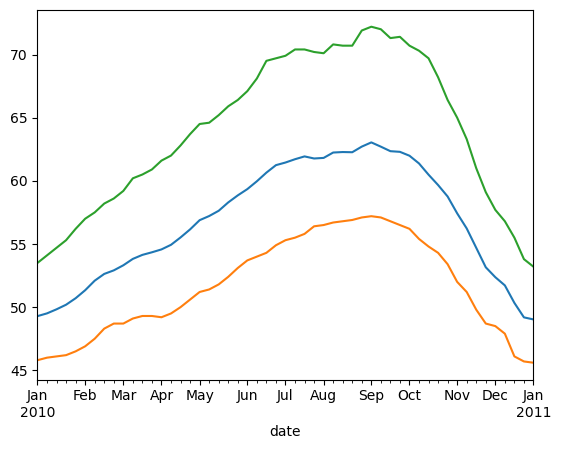

In [90]:
temp_df.resample('W').mean()['temp'].plot()
temp_df.resample('W').min()['temp'].plot()
temp_df.resample('W').max()['temp'].plot()

In [16]:
sea_df = data.seattle_weather()
sea_df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [17]:
sea_df['date'] = pd.to_datetime(sea_df['date'])
sea_df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [18]:
sea_df = sea_df.set_index('date')
sea_df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


1. Which year and month combination has the highest amount of precipitation?

In [19]:
monthly_df = sea_df.resample('M').max()
monthly_df['precipitation'].idxmax()


Timestamp('2015-03-31 00:00:00', freq='M')

In [20]:
yearly_df = sea_df.resample('Y').max()
yearly_df['precipitation'].idxmax()

Timestamp('2015-12-31 00:00:00', freq='A-DEC')

2. Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

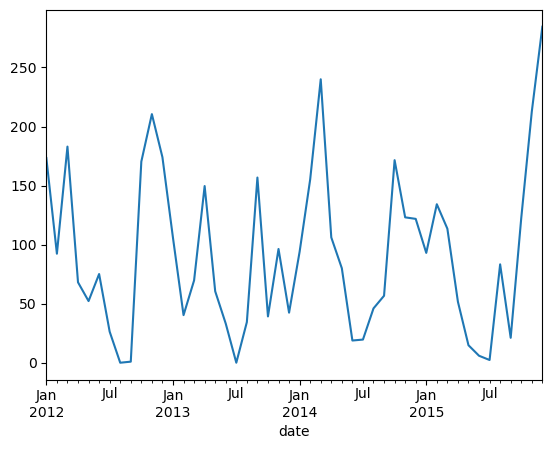

In [21]:
sea_df.resample('M').sum()['precipitation'].plot()

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

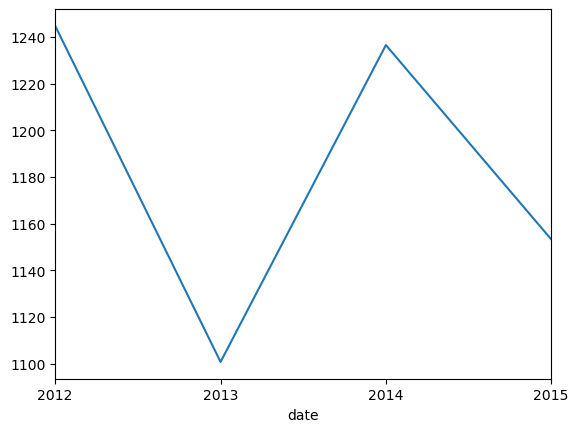

In [22]:
sea_df.resample('Y').sum()['wind'].plot()

4. Which year-month combination is the windiest?

In [23]:
wind_monthly_df = sea_df.resample('M').max()
wind_monthly_df['wind'].idxmax()


Timestamp('2012-12-31 00:00:00', freq='M')

In [24]:
wind_yearly_df = sea_df.resample('Y').max()
wind_yearly_df['wind'].idxmax()

Timestamp('2012-12-31 00:00:00', freq='A-DEC')

5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [34]:
sun_yearly_df = sea_df.resample('D').max()
sun_yearly_df['is_sunny'] = sun_yearly_df['weather'] == 'sun'
sun_yearly_df['is_sunny'] = np.where(sun_yearly_df['is_sunny'] == True, 1, 0)
sun_yearly_df = sun_yearly_df.resample('Y').sum()
sun_yearly_df['is_sunny'].idxmax()

Timestamp('2014-12-31 00:00:00', freq='A-DEC')

6. In which month does it rain the most?

In [39]:
rain_monthly_df = sea_df.resample('D').max()
rain_monthly_df['raining'] = rain_monthly_df['weather'] == 'rain'
rain_monthly_df['raining'] = np.where(rain_monthly_df['raining'] == True, 1, 0)
rain_monthly_df = rain_monthly_df.resample('M').sum()
rain_monthly_df['raining'].idxmax()

Timestamp('2012-11-30 00:00:00', freq='M')

7. Which month has the most number of days with a non-zero amount of precipitation?

In [92]:
zero_precip_monthly_df = sea_df.resample('D').max()
zero_precip_monthly_df['no_precip'] = zero_precip_monthly_df['precipitation'] == 0.0
zero_precip_monthly_df['no_precip'] = np.where(zero_precip_monthly_df['precipitation'] == True, 1, 0)
zero_precip_monthly_df = zero_precip_monthly_df.resample('M').sum()
zero_precip_monthly_df['no_precip'].idxmax()

Timestamp('2015-03-31 00:00:00', freq='M')

In [64]:
flights_df = data.flights_20k()
flights_df

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


1. Convert any negative delays to 0.

In [65]:
flights_df['date'] = pd.to_datetime(flights_df['date'])
flights_df.dtypes

date           datetime64[ns]
delay                   int64
distance                int64
origin                 object
destination            object
dtype: object

In [66]:
flights_df = flights_df.set_index('date')
flights_df

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,-5,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,-15,550,MSY,MCO
2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK
2001-01-19 13:05:00,-6,1489,SEA,MCI
2001-02-07 11:37:00,-16,1848,MCO,PHX


In [68]:
flights_df['delay'] = np.where(flights_df['delay'] < 0, 0, flights_df['delay'])
flights_df

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND
...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK
2001-01-19 13:05:00,0,1489,SEA,MCI
2001-02-07 11:37:00,0,1848,MCO,PHX


2. Which hour of the day has the highest average delay?

In [73]:
hourly_avg = flights_df['delay'].resample('H').mean()

hourly_avg.idxmax()

Timestamp('2001-02-23 03:00:00', freq='H')

3. Does the day of the week make a difference in the delay amount?

In [93]:
flights_df = data.flights_20k()
flights_df['day_of_week'] = flights_df['date'].dt.day_name()
flights_df

,date,delay,distance,origin,destination,day_of_week
0,2001-01-13 14:56:00,32,417,SAN,SJC,Saturday
1,2001-01-31 16:40:00,-5,1093,FLL,ISP,Wednesday
2,2001-02-11 18:39:00,3,293,LBB,DAL,Sunday
3,2001-01-10 21:00:00,-15,550,MSY,MCO,Wednesday
4,2001-03-30 21:45:00,-2,229,STL,IND,Friday
...,...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK,Thursday
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI,Friday
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX,Wednesday
19998,2001-02-24 16:50:00,42,443,RDU,BNA,Saturday


In [95]:
flights_df.groupby('day_of_week').delay.mean().sort_values(ascending=False)

day_of_week
Friday       15.594452
Thursday     10.245766
Wednesday     8.161416
Sunday        7.255164
Tuesday       6.198981
Saturday      4.667520
Monday        3.595973
Name: delay, dtype: float64

4. Does the month make a difference in the delay amount?

In [100]:
flights_df['month'] = flights_df['date'].dt.month_name()

In [102]:
monthly_delay = flights_df.groupby('month').delay.mean().sort_values(ascending=False)
monthly_delay

month
February    9.398338
January     8.242630
March       6.804310
Name: delay, dtype: float64